<a href="https://colab.research.google.com/github/Thujaina/NIT-Internship/blob/main/ecg_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install imblearn

In [4]:
!pip install seaborn

In [2]:
!pip install -U tensorflow scikeras imbalanced-learn

In [3]:
!pip install scikeras

In [4]:
!pip install -U scikit-learn scikeras tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 42.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [5]:
from scikeras.wrappers import KerasClassifier

In [6]:
from sklearn.model_selection import KFold, cross_val_score

In [8]:
# Importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# deep learning libraries:
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.combine import SMOTEENN
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [10]:
!ls /content/drive/MyDrive/datasets/ECG/


mitbih_test.csv  mitbih_train.csv


In [11]:
import pandas as pd

TRAIN_PATH = "/content/drive/MyDrive/datasets/ECG/mitbih_train.csv"
TEST_PATH  = "/content/drive/MyDrive/datasets/ECG/mitbih_test.csv"

train = pd.read_csv(TRAIN_PATH,header=None)
test  = pd.read_csv(TEST_PATH,header=None)

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (87554, 188)
Test shape: (21892, 188)


In [12]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (87554, 188)
Test shape: (21892, 188)


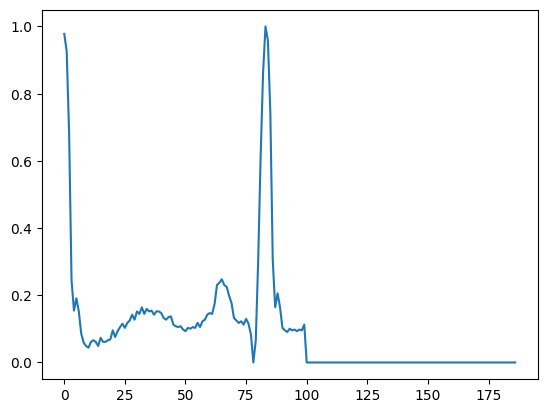

In [15]:
# Visualize the first row after excluding the last column (Class):
plt.plot(train.iloc[0, train.columns != 187])
plt.show()

In [16]:
# observing the number of subject per class:
train.iloc[:, -1].value_counts()

,count
187,
0.0,72471
4.0,6431
2.0,5788
1.0,2223
3.0,641


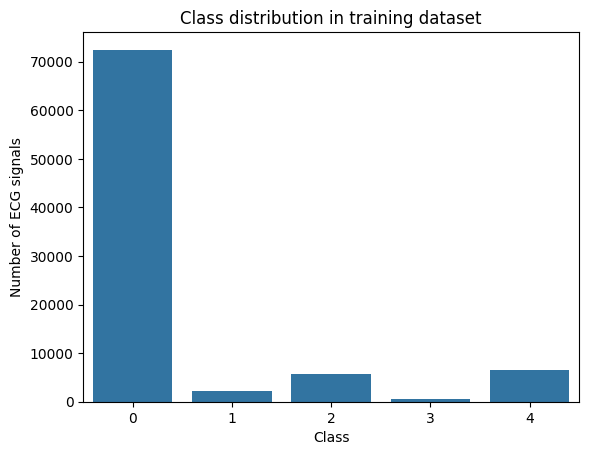

In [17]:
# Visualize the number of subjects in each class in the train dataset:
counts = train.iloc[:, -1].value_counts().sort_index()
classes = [0, 1, 2, 3, 4]
sns.barplot(x=classes, y=counts.values)
plt.xlabel("Class")
plt.ylabel("Number of ECG signals")
plt.title("Class distribution in training dataset")
plt.show()


In [19]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


from matplotlib import pyplot as plt
_df_0[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x=3, y=4, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[14]
  ys = series[0]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values(14, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(14)
_ = plt.ylabel(0)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[14]
  ys = series[1]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values(14, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(14)
_ = plt.ylabel(1)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[14]
  ys = series[2]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values(14, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(14)
_ = plt.ylabel(2)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[14]
  ys = series[3]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values(14, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(14)
_ = plt.ylabel(3)

from matplotlib import pyplot as plt
_df_12[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

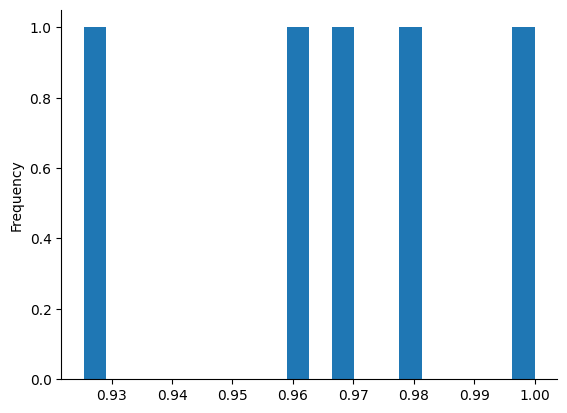

In [29]:
from matplotlib import pyplot as plt
_df_0[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

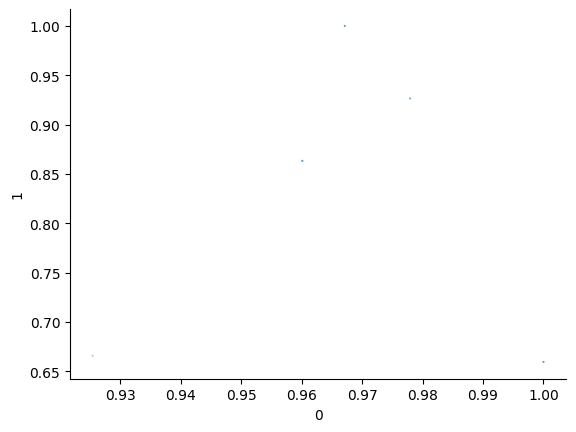

In [30]:
from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

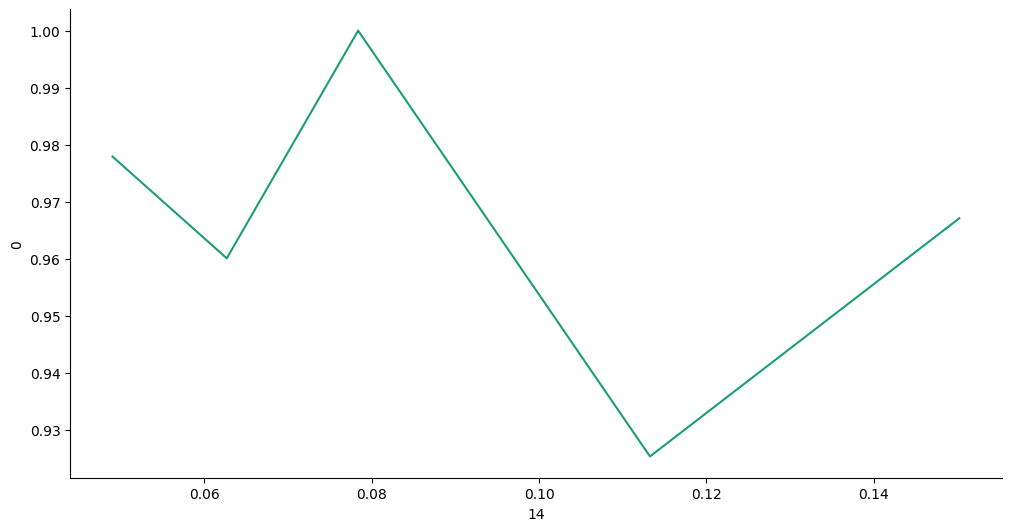

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[14]
  ys = series[0]

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values(14, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(14)
_ = plt.ylabel(0)

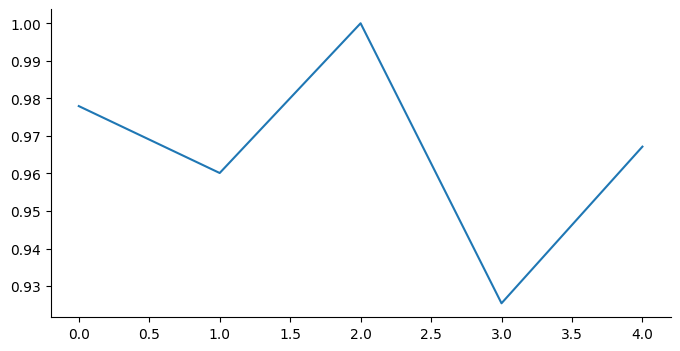

In [32]:
from matplotlib import pyplot as plt
_df_12[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

In [27]:
# checking missing values:
train.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
183,0
184,0
185,0
186,0


In [28]:
test.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
183,0
184,0
185,0
186,0


In [33]:
# Splitting the data:
# creating X and y from train dataset:
#X_train = train.loc[:,train.columns !=187]
#y_train = train.loc[: , train.columns == 187]
X_train = train.iloc[:, :-1]   # columns 0–186
y_train = train.iloc[:, -1]    # column 187 as Series


In [34]:
# data balancing:....no need
#sme = SMOTEENN(random_state=42)...no need
#X_res, y_res = sme.fit_resample(X_train, y_train)...no need
# Train model without any balancing

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


In [ ]:
# Add ENN in the next cell after SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours(n_neighbors=3)
X_clean, y_clean = enn.fit_resample(X_sm, y_sm)
print("After ENN:", y_clean.value_counts())


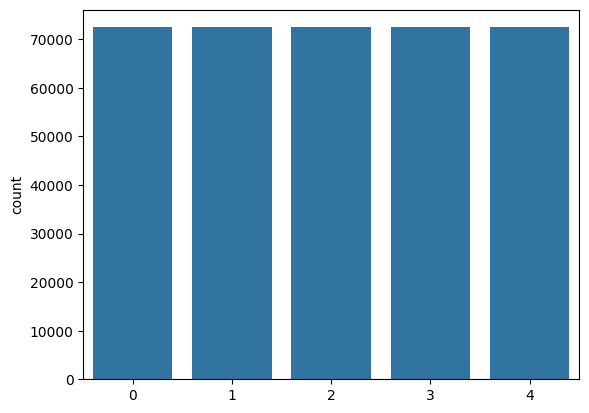

In [35]:
sns.barplot(x= classes, y=y_res.value_counts())
plt.show()

In [36]:
# creating Validation set from train set:
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=0)


In [37]:
# creating X and y from test dataset:
X_test = test.loc[:,train.columns !=187]
y_test = test.loc[: , train.columns == 187]

In [38]:
def ann_model():
    model = Sequential()
    model.add(Dense(50, input_shape=(187,), activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [39]:
model = ann_model()
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)


Epoch 1/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8374 - loss: 0.4449 - val_accuracy: 0.9380 - val_loss: 0.1771
Epoch 2/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9418 - loss: 0.1658 - val_accuracy: 0.9509 - val_loss: 0.1406
Epoch 3/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9593 - loss: 0.1188 - val_accuracy: 0.9675 - val_loss: 0.0975
Epoch 4/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9673 - loss: 0.0965 - val_accuracy: 0.9682 - val_loss: 0.0968
Epoch 5/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9724 - loss: 0.0825 - val_accuracy: 0.9737 - val_loss: 0.0802
Epoch 6/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9748 - loss: 0.0729 - val_accuracy: 0.9802 - val_loss: 0.0613
Epoch 7/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9781 - loss: 0.0652 - val_accuracy: 0.9763 - val_loss: 0.0668
Epoch 8/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9798 - loss: 0

In [40]:
from sklearn.metrics import matthews_corrcoef
import numpy as np

y_pred = np.argmax(model.predict(X_val), axis=1)
mcc = matthews_corrcoef(y_val, y_pred)

print("Validation MCC:", mcc)


2265/2265 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Validation MCC: 0.9807547049510886


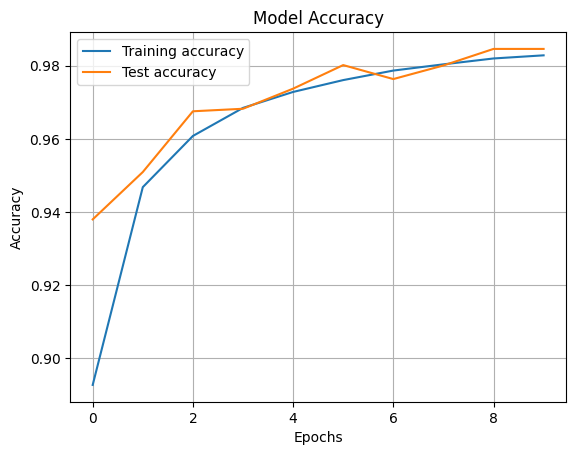

In [41]:
# Training and validation Accuracy:
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Test accuracy")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()
plt.show()

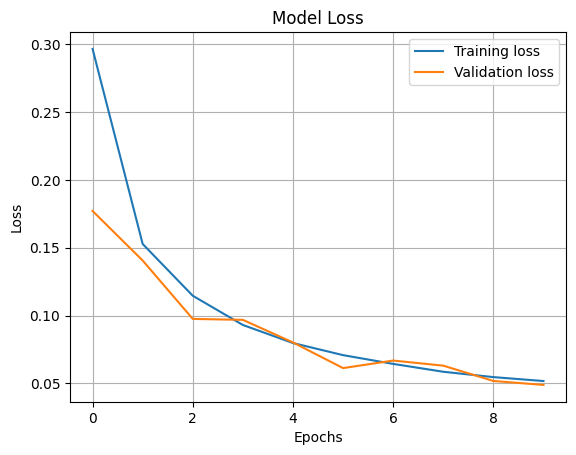

In [42]:
# Training and validation Loss:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()
plt.show()

In [44]:
# prediction for ANN model:
model_predictions = model.predict(X_test)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Model Accuracy is {test_acc}')
print(f'Model Loss is {test_loss}')

685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9623 - loss: 0.1174
Model Accuracy is 0.9570619463920593
Model Loss is 0.1634320467710495


In [45]:
# Classification report:
print(classification_report(y_true=y_test, y_pred=np.argmax(model_predictions, axis=1)))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98     18118
         1.0       0.48      0.82      0.61       556
         2.0       0.92      0.93      0.92      1448
         3.0       0.54      0.80      0.64       162
         4.0       0.98      0.97      0.98      1608

    accuracy                           0.96     21892
   macro avg       0.78      0.90      0.83     21892
weighted avg       0.97      0.96      0.96     21892



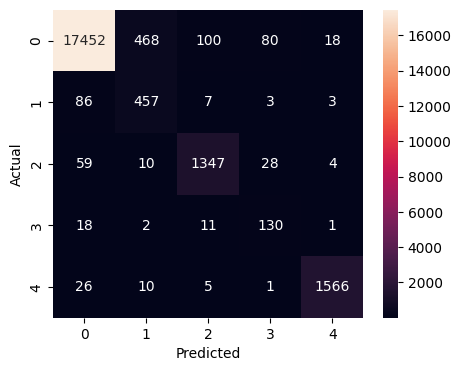

In [46]:
# Confusion Matrix:
cm = confusion_matrix(y_true=y_test, y_pred=np.argmax(model_predictions, axis=1))
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [35]:
pip install scikit-learn

In [47]:
estimator = KerasClassifier(
    model=ann_model,
    epochs=10,
    batch_size=64,
    verbose=0
)

In [48]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=4, shuffle=True, random_state=42)

results = cross_val_score(
    estimator,
    X_train,
    y_train,
    cv=kfold,
    scoring='accuracy'
)

print("Cross-validation scores:", results)
print("Mean CV accuracy:", results.mean())

Cross-validation scores: [0.97611458 0.97873632 0.97514868 0.97488651]
Mean CV accuracy: 0.9762215230919954


In [50]:
cv_results = pd.DataFrame(
    [results],                # 👈 this is the key fix
    columns=[0, 1, 2, 3]
)

cv_results.index = ['ANN']
cv_results['Mean'] = cv_results.mean(axis=1)

cv_results

,0,1,2,3,Mean
ANN,0.976115,0.978736,0.975149,0.974887,0.976222
